In [1]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

import glob
import numpy as np

# Load nuPyProp Data Module
from nupyprop import data

# Plotting defaults
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
from cycler import cycler
import matplotlib.pyplot as plt
cm = plt.get_cmap('jet')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['legend.frameon'] = False

# See output files in current directory

In [2]:
for file in glob.glob('*h5'):
    print(file)

output_nu_tau_4km_ct18nlo_allm_stochastic_1e8.h5


# Set desired parameters for output file

In [3]:
nu_type = 'nu'
lepton = 'tau' # type of lepton
nu_tye = 'neutrino' # nu for neutrino & anu for anti-neutrino
cross_section_model = 'ct18nlo' # neutrino cross-section model
pn_model = 'allm' # photonuclear energy loss model
idepth = 4 # depth of water layer in km
stats = 1e8 # no. of ingoing neutrinos ie., statistics
prop_type = 'stochastic' # type of energy loss; can be stochastic or continuous

## Function to get p_exit values

In [ ]:
def p_exit(nu_type, lepton, energies, reg, idepth, nu_cs, lep_pn, type_loss, stats):
    os.chdir(data_dir)
    p_exit_dict = {}
    for energy in energies:
        p_exit = Data.get_pexit(nu_type, lepton, energy, reg, idepth, nu_cs, lep_pn, type_loss, stats)
        lists = sorted(p_exit.items())
        x,y = zip(*lists)
        p_exit_dict[energy] = np.asarray(y)
    return p_exit_dict

## Function to plot exit probability Vs. Earth emergence angles

AttributeError: 'Line2D' object has no property 'cmap'

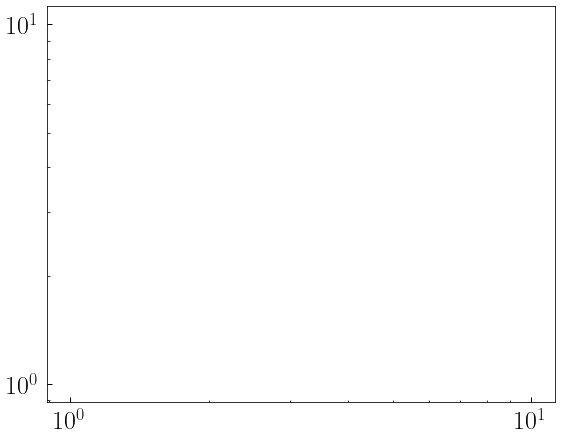

In [14]:
energies = np.logspace(7,11,17)
angles = np.arange(1,36)

cm = plt.get_cmap('hsv')

# if len(energies) > 4:
#     cc = (cycler(color=list('rgbkm')) * cycler(linestyle=['solid', 'dotted', 'dashed', 'dashdot']))
# else:
#     cc = (cycler(color=list('rgbkm')))

# params = {'axes.prop_cycle': cc}
# plt.rcParams.update(params)
fig, axs = plt.subplots(1, figsize=(10/1.1, 8/1.1))
# axs = ax.ravel()

for i,energy in enumerate(energies):
    
    pexit_no_regen = data.get_pexit(nu_type, lepton, energy, idepth, cross_section_model, pn_model, prop_type, stats)[0] # without regen
    pexit_regen = data.get_pexit(nu_type, lepton, energy, idepth, cross_section_model, pn_model, prop_type, stats)[1] # without regen
#     c=cm((len(mDM)-i)/float(len(mDM))))
    energy_log = float(np.log10(energy))

#     axs.loglog(angles, pexit_regen, linewidth = 2, label = '%.0d' % energy_log)
#     axs.loglog(angles, pexit_regen, linewidth = 2, c=cm((len(energies)-i)/float(len(energies))))
    axs.loglog(angles, pexit_regen, linewidth = 2, cmap=plt.get_cmap('hsv'))

# print(int(len(energies)/4))
# axs.legend(loc='best',ncol=int(len(energies)/4), title = r'log$_{10}(E_{\nu}/GeV)$', frameon=False, framealpha=0.5)
    
ticks = (1,2,3,4,5,10,15,20,30)
axs.set_xticks(ticks)
axs.set_xticklabels([i for i in ticks])


axs.grid(which='major', axis='both', linestyle='--')
axs.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
axs.xaxis.set_ticks_position('both')
axs.yaxis.set_ticks_position('both')
axs.tick_params(axis='x', which='both', labelbottom = True, labeltop = False)
axs.tick_params(axis='y', which='both', left = True, labelleft = True, labelright= True)
for axis in [axs.xaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs.set_xlabel("Emergence Angle (Deg)", fontsize=30)

axs.set_ylabel(r"$P_{exit}$", fontsize=30)
axs.set_ylim(1e-6,1e-1)

axs.set_xlim(1,35)

plt.tight_layout()
    

In [ ]:
def plot_npp(nu_type, lepton, energies, idepth, nu_cs, lep_pn, loss_type, stats):
    p_exit_dict = p_exit(nu_type, lepton, energies, 'regen', idepth, nu_cs, lep_pn, loss_type, stats)
    
    angles = np.arange(1,36)
    
    if len(energies) > 4:
        cc = (cycler(color=list('rgbkm')) * cycler(linestyle=['solid', 'dotted', 'dashed', 'dashdot']))
    else:
        cc = (cycler(color=list('rgbkm')))
              
    params = {'axes.prop_cycle': cc}
    plt.rcParams.update(params)

    fig, axs = plt.subplots(figsize=(20,10),dpi=100)
#     color_lst = ['r', 'g', 'b', 'k', 'm']

    for i in range(len(energies)):
        energy_log = int(np.log10(energies[i]))

        axs.loglog(angles, p_exit_dict[energies[i]], linewidth = 2, label = '%.0d' % energy_log)


        axs.legend(loc='best',ncol=int(len(energies)/2), title = r'log$_{10}(E_{\nu}/GeV)$', frameon=False, framealpha=0.5)


    # ticks = (1,2,3,4,5,6,7,8,9,10,20,30,40,50)
    # ticks = (1,2,3,4,5,6,7,8,9,10,15,20,25,30,35)
    ticks = (1,2,3,4,5,10,15,20,25,30,35)
    axs.set_xticks(ticks)
    axs.set_xticklabels([i for i in ticks])


    axs.grid(which='major', axis='both', linestyle='--')
    axs.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    axs.xaxis.set_ticks_position('both')
    axs.yaxis.set_ticks_position('both')
    axs.tick_params(axis='x', which='both', labelbottom = True, labeltop = False)
    axs.tick_params(axis='y', which='both', left = True, labelleft = True, labelright= True)
    for axis in [axs.xaxis]:
        axis.set_major_formatter(ScalarFormatter())
    axs.set_xlabel("Emergence Angle (Deg)")

    axs.set_ylabel(r"$P_{exit}$")
    axs.set_ylim(1e-6,1e-1)

    axs.set_xlim(1,35)

    plt.tight_layout()
    # plt.savefig('p_exit_npp.png', format='png', dpi = 100)

    return None

In [ ]:
plot_npp(nu_type, lepton, energies, idepth, nu_cs, lep_pn, loss_type, stats)